In [111]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
                                    # train_test_split : train data, test data를 나누는 함수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

In [112]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [113]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
results = [1]*35+[0]*14

In [114]:
# DataFrame (자동)
data = [ length, weight, results ]
df = pd.DataFrame(data)
df = df.T # 행렬 전환(행과 열이 바뀜)
df

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [115]:
datas = df.iloc[:,:2]
datas

resutls = df.iloc[:,2]
results

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [116]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(datas, results)
# ==> random shuffle(수동)을 하지 않고 자동으로 섞어줌.

train_input, test_input, train_target, test_target = train_test_split(
    datas, results, stratify=results, random_state=42
    )
# stratify = 데이터 : 설정 데이터를 가지고 랜덤으로 데이터를 섞어줌. 
# random_state = 숫자 : 데이터 고정, 넣어주지 않으면 엔터 누를 때마다 랜덤값이 계속 바뀜. 
#                       숫자가 높을수록 바뀌지 않음, 훈련 세트, 테스트 세트가 할 때마다 섞이지 않도록 해줌.

train_input

,0,1
6,29.7,500.0
44,12.2,12.2
17,33.0,700.0
40,11.3,8.7
32,39.5,925.0
4,29.0,430.0
27,36.0,714.0
28,36.0,850.0
10,31.0,475.0
26,35.0,720.0


In [117]:
# 1. 데이터의 전처리 
     # - NaN, 0 : data를 어떻게 처리할 것인지?
     # - data type(str->int/float 변환)
     # - data 표준화작업 처리 여부 확인
     # - 훈련 세트 및 테스트 세트 구성

# 2. 데이터 학습시키기
clf = KNeighborsClassifier()
clf.fit(train_input, train_target)

# 3. 데이터 예측하기
predict = clf.predict(test_input)
predict # test_target을 확인하여 맞는지 틀린지 확인가능(틀릴 수도 있어) ==> 정답률 구하기

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [118]:
# 4. 정확도 측정/정답률 구하기
score = clf.score(test_input, test_target)
print("정답률 : ", score) # 1.0

정답률 :  1.0


In [119]:
# 실험 데이터로 확인
predict = clf.predict([[30,600]])
print("판별 : ", predict) # 1(도미)

판별 :  [1]


In [120]:
# 길이 25, 무게 125인 생선을 판별하시오.

# 실험데이터로 확인
predict = clf.predict([[25,125]])
print('판별 : ', predict) # 0 : 빙어



판별 :  [0]


In [121]:
# 25, 125 데이터는 KNN 판별할 때 이웃하는 데이터는 indexes
distance,indexes = clf.kneighbors([[25,125]])
indexes

array([[33, 19, 30,  1, 13]], dtype=int64)

In [122]:
train_input.iloc[indexes[0], 0]
train_input.iloc[indexes[0], 1]

48    19.9
47    19.7
46    12.2
44    12.2
43     9.8
Name: 1, dtype: float64

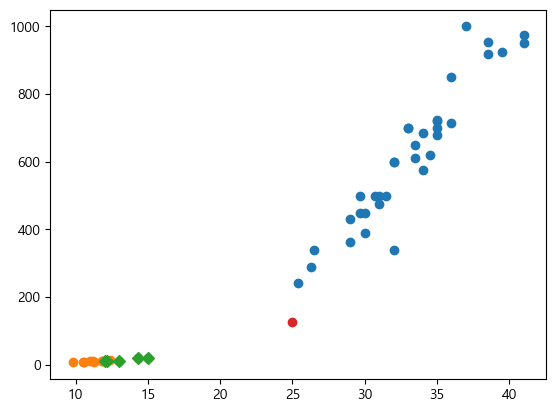

In [123]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(train_input.iloc[indexes[0], 0], train_input.iloc[indexes[0], 1], marker='D')
plt.scatter(25,125)
# plt.xticks([0,1000]) # 데이터 일렬로 세우기
# 빙어의 개수(4)가 도미의 개수(0)보다 많아서 0(빙어)로 결과값이 나옴.

# 근접알고니즘 예측 오류(거리에 민감)
# 표준점수 = (훈련 데이터 - 평균)/표준편차 ===> 비율 형태로 바꿔줌(-1.5 ~ 1.5 사이의 값으로 환산)

In [124]:
# pandas로 평균(mean), 표준편차(std) 구하기
train_input[0].mean() # 평균 27.297222222222224
train_input[0].std() # 표준편차 10.124044536536658

10.124044536536658

In [129]:
# numpy로 평균(mean), 표준편차(std) 구하기

# 표준점수 = (훈련 데이터-평균)/표준편차
type(train_input)

mean = np.mean(train_input, axis=0) # 평균 27.297222
std = np.std(train_input, axis=0) # 표준편차 9.982443,  axis는 방향, axis=0은 0번 컬럼을 의미
std

0      9.982443
1    323.298939
dtype: float64

In [126]:
# train_input, test_input
train_scaled = (train_input - mean) / std

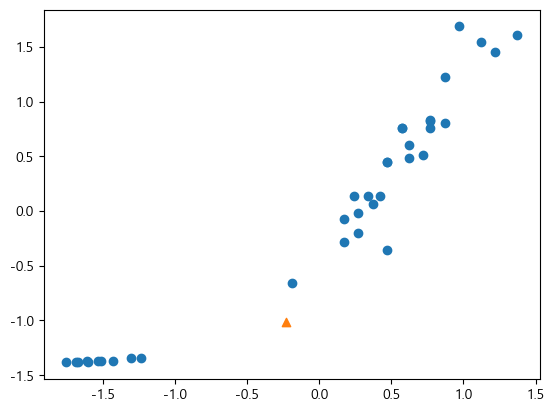

In [144]:
plt.scatter(train_scaled.iloc[:,0], train_scaled.iloc[:,1])
# 표준점수
# plt.scatter(25,125, marker='^') # 표준화 해주어야 함.
new=([25,125]-mean)/std
new
plt.scatter(new[0],new[1], marker='^')

In [132]:
clf.fit(train_scaled, train_target)


KNeighborsClassifier()

In [133]:
mean2 = np.mean(test_input, axis=0)

In [134]:
test_scaled = (test_input - mean2) / std

In [135]:
score = clf.score(test_scaled, test_target)
print("정답률 : ", score)

정답률 :  1.0


In [136]:
predict = clf.predict([new])
print("예측값 : ", predict) # 1 ==> 표준화 작업 후 1(도미)로 나옴

예측값 :  [1]


In [138]:
# KNN 예측에 사용한 데이터
distance, indexes = clf.kneighbors([new])
indexes

array([[10, 35, 17,  4,  7]], dtype=int64)

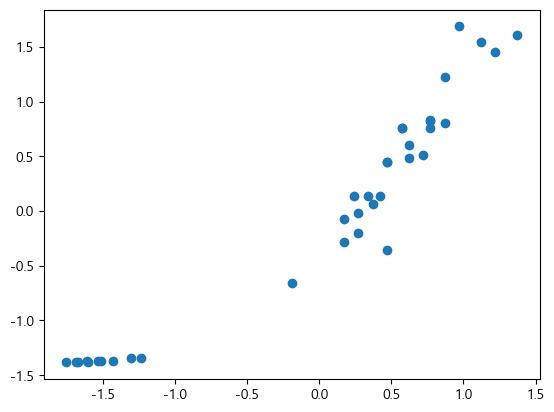

In [140]:
plt.scatter(train_scaled.iloc[:,0], train_scaled.iloc[:, 1])


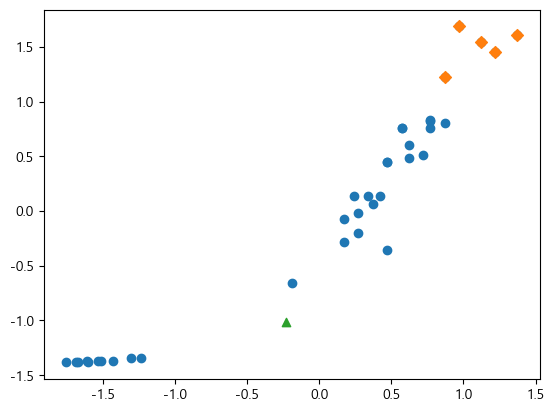

In [145]:
plt.scatter(train_scaled.iloc[:,0], train_scaled.iloc[:, 1])
plt.scatter(train_scaled.iloc[indexes[0], 0], train_scaled.iloc[indexes[0], 1], marker='D')
plt.scatter(new[0],new[1], marker='^')